# Pre-processing and cleaning data: Predicting House Prices using Machine Learning

## A Case Study of Saudi Arabia

### 1. Importing the Libraries

In [2]:
# for data edit
import numpy as np
import pandas as pd
import math

# Libraries for drow chart
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# for missing data
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# for encode the data 
from sklearn.preprocessing import LabelEncoder

### 2. Load the dataset

In [3]:
AQAR_Data = pd.read_csv(r"../../DataSet/aqarItemsData19971.csv")
df = AQAR_Data.copy()

###  3. Drop Features

We have some faetures that we want to drop because they do not add any value to the project like:
- title
- description
- ad_number
- last_update
- views

In [4]:
df.drop(columns=['title','description','ad_number','last_update','views'], axis=1, inplace = True)

## 4. Fix data 

### 4.1 fix the `front` feature

In [5]:
df.loc[df['front'] == 'شمالية', 'front'] = 'North'
df.loc[df['front'] == 'جنوبية', 'front'] = 'South'
df.loc[df['front'] == 'غربية', 'front'] = 'West'
df.loc[df['front'] == 'شرقية', 'front'] = 'ُEast'
df.loc[df['front'] == 'شمالية شرقية', 'front'] = 'North-East'
df.loc[df['front'] == 'شمالية غربية', 'front'] = 'North-West'
df.loc[df['front'] == 'جنوبية شرقية', 'front'] = 'South-East'
df.loc[df['front'] == 'جنوبية غربية', 'front'] = 'South-West'
df.loc[df['front'] == 'ثلاث شوارع', 'front'] = 'Three-Streets'
df.loc[df['front'] == 'أربع شوارع', 'front'] = 'Four-Streets'
df['front'].unique()

array(['North-West', 'South', 'ُEast', 'South-West', 'West', 'North',
       'South-East', 'North-East', 'Three-Streets', 'Four-Streets', nan],
      dtype=object)

### 4.2 fix the `area` feature

In [6]:
df['area'] = df['area'].str.split().str[0]
df['area'] = df['area'].str.replace(',','')
df['area'] = df['area'].str.replace('م²','0')
df['area'] = df['area'].astype('int')
df['area'].unique()

array([ 103,  144,  340,  182,  197,  112,  297,  179,  131,  230,  252,
        472,  194,  175,  100,  166,  135,  180,  280,  105,  200,   97,
        128,  140,  161,  190,  185,  130,  164,  173,  220,  170,  139,
        215,  232,  120,  118,  210,  138,  129,   98,  177,  235,  160,
        186,  163,  300,  147,  221,  400,  142,  266,  370,  188,  145,
        218,  125,  273,  165,  150,  134,  110,  650,  315,  151,  250,
        245,  121,  146,  260,  176,  263,  171,  183,  155,  265,  189,
        225,  240,  109,  251,  159,  133,  270,  132,  202,  174,  330,
        122,  213,  238,  275,  115,  169,  700,  600,  167,  192,  196,
        127,  119,  219,  195,  191,  216,  141,  172,  325,  207,   20,
        148,  113,  227,  223,  153,  241,  310,  162,  136,  312,  158,
        258,   96,   88,  152,   81,  168,  198,  247,  209,  205,  203,
        303,  156,  262,  224,  305,  212,  107,  350,   93,  281,  217,
        450,  178,  380,  289,  199,  114,  204,  1

### 4.3 fix the `price` feature

In [7]:
df['price'].fillna(value = np.nan, inplace = True)
df['price'] = df['price'].str.replace('ريال', '')
df['price'] = df['price'].str.replace('شهري', '')
df['price'] = df['price'].str.replace('سنوي', '')
df['price'] = df['price'].str.replace('/', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.strip()
df = df[df['price'].notna()]
df['price'] = df['price'].astype('int')
df['price'].unique()

array([  420000,   610000,   960000,   500000,   580000,   335000,
         950000,   680000,   900000,   780000,   850000,  5150000,
         720000,   490000,   360000,   520000,  1020000,  1100000,
         690000,   745000,   499000,   600000,   990000,   751000,
         290000,   550000,   530000,   440000,   450000,   979000,
         800000,   750000,   560000,  1145000,    50000,   670000,
         620000,   350000,   909000,   319000,   700000,   540000,
         545000,   740000,  1450000,   980000,   470000,   570000,
         770000,   930000,  1000000,   485000,  8300000,   400000,
         820000,   430000,  1250000,   410000,   959000,   460000,
         640000,   825000,   940000,  1189000,   650000,   730000,
         535000,   480000,   465000,  9019000,   445000,   615000,
         590000,   675000,   475000,   899000,   710000,   619000,
         760000,   830000,  1400000,   795000,  3800000,   749000,
         951000,   459000,   890000,   660000,   320000,   790

### 4.4 fix the `bath_rooms` feature

In [8]:
df.loc[df['bath_rooms']  == '5+', 'bath_rooms'] = '5'
df['bath_rooms'] = df['bath_rooms'].astype('int')
df['bath_rooms'].unique()

array([3, 2, 5, 4, 1])

### 4.5 fix the `level` feature

In [9]:
df.loc[df['level'] == '20+', 'level'] = '20'
df.loc[df['level'] == 'أول', 'level'] = '2'
df.loc[df['level'] == 'أرضي', 'level'] = '1'
df['level'].unique()

array(['4', '1', '2', nan, '16', '3', '5', '6', '7', '13', '20', '11',
       '8', '18', '17', '12', '9', '14', '10', '19'], dtype=object)

### 4.6 fix the `age` feature

In [10]:
df.loc[df['age'] == 'جديد', 'age'] = '0'
df.loc[df['age'] == '35+', 'age'] = '35'
df['age'].unique()

array(['8', '0', '1', nan, '9', '7', '12', '15', '11', '2', '10', '6',
       '14', '5', '3', '4', '25', '30', '17', '16', '13', '33', '18',
       '20', '29', '35', '28', '32', '19'], dtype=object)

### 4.7 fix the `rooms` feature

In [11]:
df.loc[df['rooms']  == '7+', 'rooms'] = '7'
df['rooms'] = df['rooms'].astype('int')
df['rooms'].unique()

array([4, 3, 2, 5, 6, 7, 1])

### 4.8 fix the `street_width` feature

In [12]:
df['street_width'] = df['street_width'].str.replace('م', '')
df[['street_width']] = df[['street_width']].fillna('0')
df['street_width'] = df['street_width'].astype('int')
df['street_width'].unique()

array([ 15,   5,  20,  40,  30, 100,  24,  32,  16,  36,   0,  50,  18,
        25,  21,  23,  33,  12,  35,  26,  22,  52,  10,  19,  57,  34,
        11,  29,  17,  31,  13,   9,  28,  45,  37,  14,  27,  39,  60,
        41,  38,  86,  70,  71,   7,  62,  56,   1,  67,   6,  44,  80,
        82,   4,  87,  81,   8,  65,  58,  51,  61,  53,  55,  54,  59,
        63,  64,  89,  74,  43,  42,  96,  76,  72,  84,  73,  88,   3,
        69,  66,  90,  98])

### 4.9 fix the `kitchen` feature

In [13]:
df['kitchen'].fillna(value = 0, inplace = True)
df['kitchen'] = df['kitchen'].astype('int')
df['kitchen'].unique()

array([1, 0])

### 4.10 fix the `garage` feature

In [14]:
df['garage'].fillna(value = 0, inplace = True)
df['garage'] = df['garage'].astype('int')
df['garage'].unique()

array([1, 0])

### 4.11 fix the `elevator` feature

In [15]:
df['elevator'].fillna(value = 0, inplace = True)
df['elevator'] = df['elevator'].astype('int')
df['elevator'].unique()

array([1, 0])

### 4.12 fix the `dimensions` feature

In [16]:
df['dimension_1'] = df['area'].apply(np.sqrt)
df['dimension_2'] = df['area'].apply(np.sqrt)
new_cols = ['id', 'city', 'district', 'front', 'rooms', 'living_rooms','bath_rooms', 'street_width', 'level', 'age', 'kitchen', 'garage','elevator', 'area', 'dimension_1', 'dimension_2', 'price']
df = df[new_cols]
df.head()

,id,city,district,front,rooms,living_rooms,bath_rooms,street_width,level,age,kitchen,garage,elevator,area,dimension_1,dimension_2,price
0,0,جدة,حي الروابي,North-West,4,NaN,3,15,4,8,1,1,1,103,10.148892,10.148892,420000
1,1,الدمام,حي الفردوس,South,3,2.0,3,5,1,0,1,1,1,144,12.000000,12.000000,610000
2,2,ابها,حي القريقر,ُEast,2,1.0,2,20,2,0,1,0,1,340,18.439089,18.439089,960000
3,3,الدمام,حي النور,South-West,5,1.0,3,40,NaN,0,0,1,1,182,13.490738,13.490738,500000
4,4,الدمام,حي النور,North-West,5,1.0,3,30,1,0,1,0,0,197,14.035669,14.035669,580000


### 5. Fix missing data 

We have some missing data and we want to fix it.

First, we will separate the data frame into two parts `numerical` and `categorical`. Then we use `IterativeImputer` to estimat the missing Values. And merge the `categorical` and `numerical` after estimation into the data frame


<AxesSubplot: >

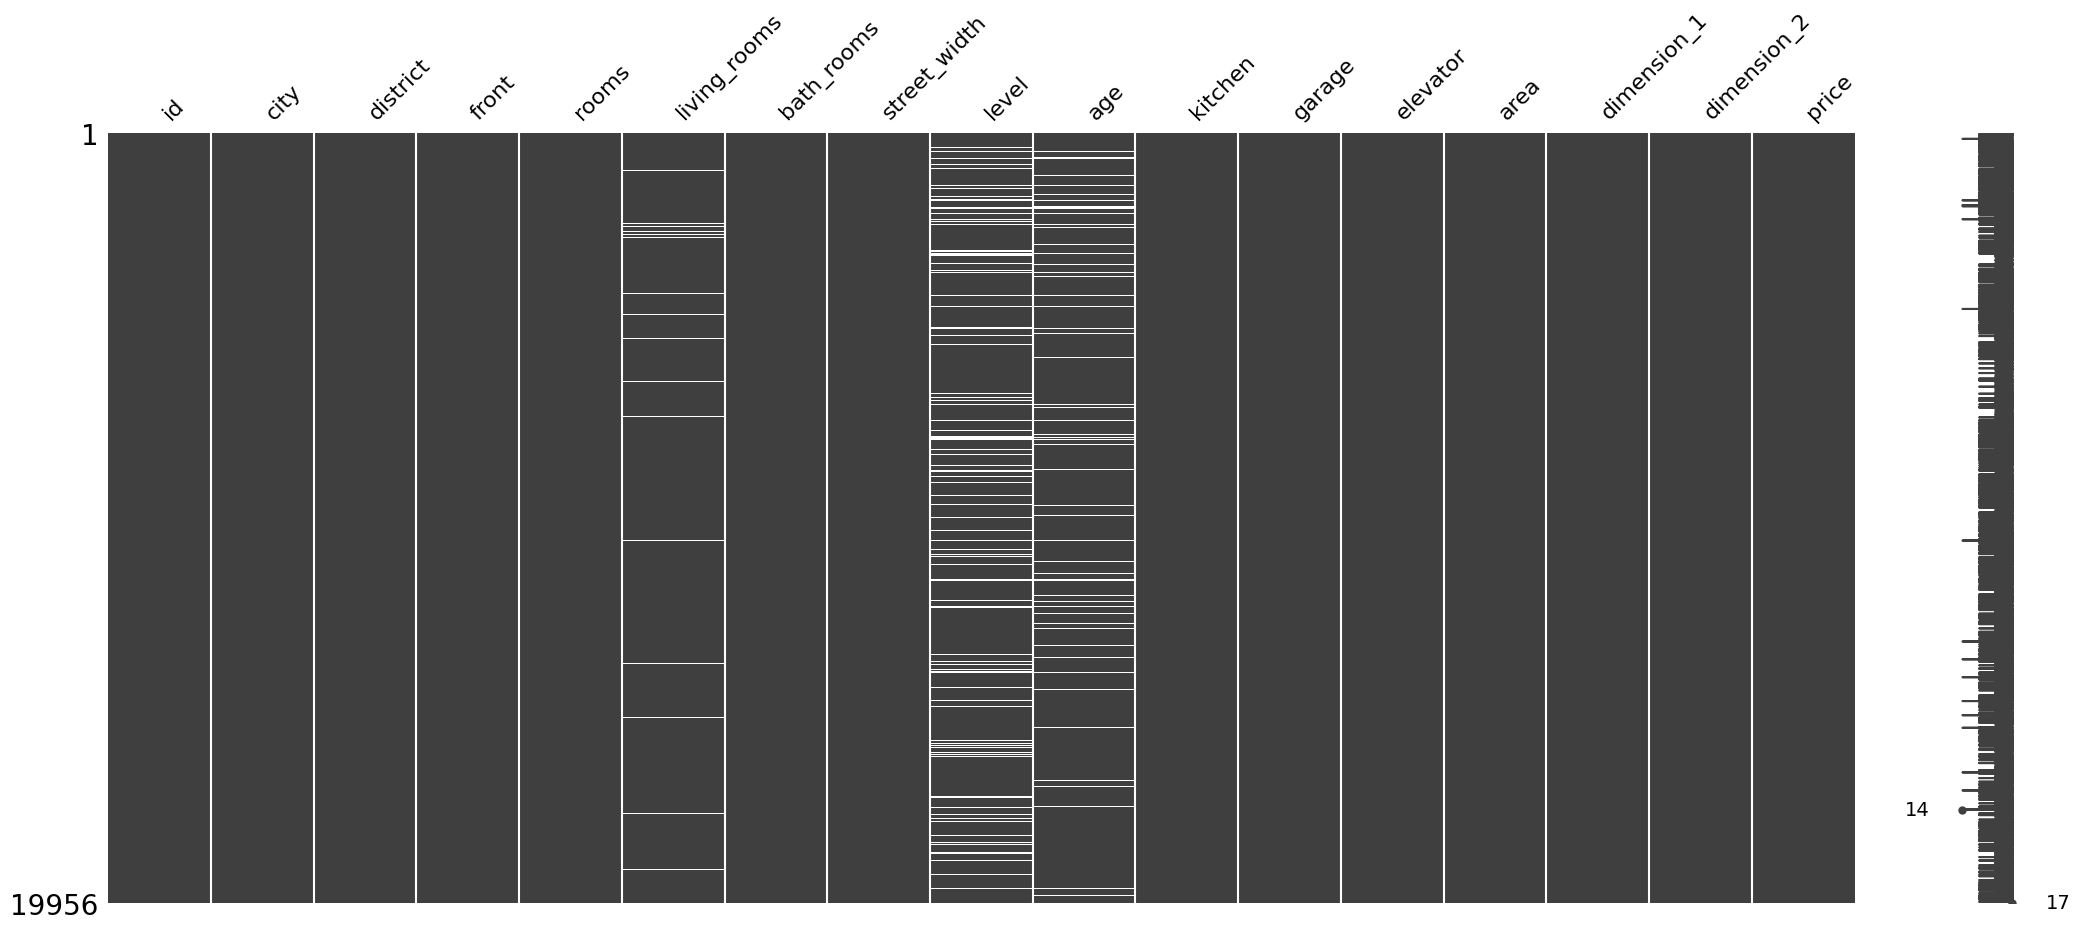

In [17]:
msno.matrix(df)

### 5.1 Separate the data frame into two parts `numerical` and `categorical`

In [18]:
df_categorical = df[['id', 'city', 'district', 'front']]
df_categorical

,id,city,district,front
0,0,جدة,حي الروابي,North-West
1,1,الدمام,حي الفردوس,South
2,2,ابها,حي القريقر,ُEast
3,3,الدمام,حي النور,South-West
4,4,الدمام,حي النور,North-West
...,...,...,...,...
19966,19966,الرياض,حي اليرموك,West
19967,19967,جدة,حي المروة,North-East
19968,19968,جدة,حي المروة,West
19969,19969,جدة,حي الفيصلية,North


In [19]:
df_numerical = df[['id', 'rooms', 'living_rooms', 'bath_rooms', 'street_width', 'level', 'age', 'kitchen', 'garage', 'elevator', 'area','dimension_1', 'dimension_2', 'price']]
df_numerical

,id,rooms,living_rooms,bath_rooms,street_width,level,age,kitchen,garage,elevator,area,dimension_1,dimension_2,price
0,0,4,NaN,3,15,4,8,1,1,1,103,10.148892,10.148892,420000
1,1,3,2.0,3,5,1,0,1,1,1,144,12.000000,12.000000,610000
2,2,2,1.0,2,20,2,0,1,0,1,340,18.439089,18.439089,960000
3,3,5,1.0,3,40,NaN,0,0,1,1,182,13.490738,13.490738,500000
4,4,5,1.0,3,30,1,0,1,0,0,197,14.035669,14.035669,580000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19966,19966,4,1.0,3,41,2,0,1,0,1,166,12.884099,12.884099,880000
19967,19967,5,1.0,4,0,3,0,1,1,1,175,13.228757,13.228757,700000
19968,19968,4,1.0,4,16,4,0,0,1,1,190,13.784049,13.784049,760000
19969,19969,4,3.0,3,25,3,0,1,1,1,171,13.076697,13.076697,570000


### 5.2 Estimat the missing Values

In [20]:
imp_mean = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
imp_mean.fit(df_numerical)
df_numerical_after_estimator = pd.DataFrame(imp_mean.transform(df_numerical), columns=['id', 'rooms', 'living_rooms', 'bath_rooms', 'street_width', 'level', 'age', 'kitchen', 'garage', 'elevator', 'area','dimension_1', 'dimension_2', 'price'], dtype=np.int64)

C:\Users\hasoo\AppData\Local\Temp\ipykernel_12788\3990333739.py:3: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  df_numerical_after_estimator = pd.DataFrame(imp_mean.transform(df_numerical), columns=['id', 'rooms', 'living_rooms', 'bath_rooms', 'street_width', 'level', 'age', 'kitchen', 'garage', 'elevator', 'area','dimension_1', 'dimension_2', 'price'], dtype=np.int64)


In [21]:
df_numerical_after_estimator.head()

,id,rooms,living_rooms,bath_rooms,street_width,level,age,kitchen,garage,elevator,area,dimension_1,dimension_2,price
0,0,4,1,3,15,4,8,1,1,1,103,10,10,420000
1,1,3,2,3,5,1,0,1,1,1,144,12,12,610000
2,2,2,1,2,20,2,0,1,0,1,340,18,18,960000
3,3,5,1,3,40,2,0,0,1,1,182,13,13,500000
4,4,5,1,3,30,1,0,1,0,0,197,14,14,580000


### 5.3 merge the data

In [22]:
df = pd.merge(df_categorical, df_numerical_after_estimator, how='left', left_on=['id'], right_on=['id'])
df.drop('id', axis=1, inplace=True)

In [23]:
df.head()

,city,district,front,rooms,living_rooms,bath_rooms,street_width,level,age,kitchen,garage,elevator,area,dimension_1,dimension_2,price
0,جدة,حي الروابي,North-West,4,1,3,15,4,8,1,1,1,103,10,10,420000
1,الدمام,حي الفردوس,South,3,2,3,5,1,0,1,1,1,144,12,12,610000
2,ابها,حي القريقر,ُEast,2,1,2,20,2,0,1,0,1,340,18,18,960000
3,الدمام,حي النور,South-West,5,1,3,40,2,0,0,1,1,182,13,13,500000
4,الدمام,حي النور,North-West,5,1,3,30,1,0,1,0,0,197,14,14,580000


<AxesSubplot: >

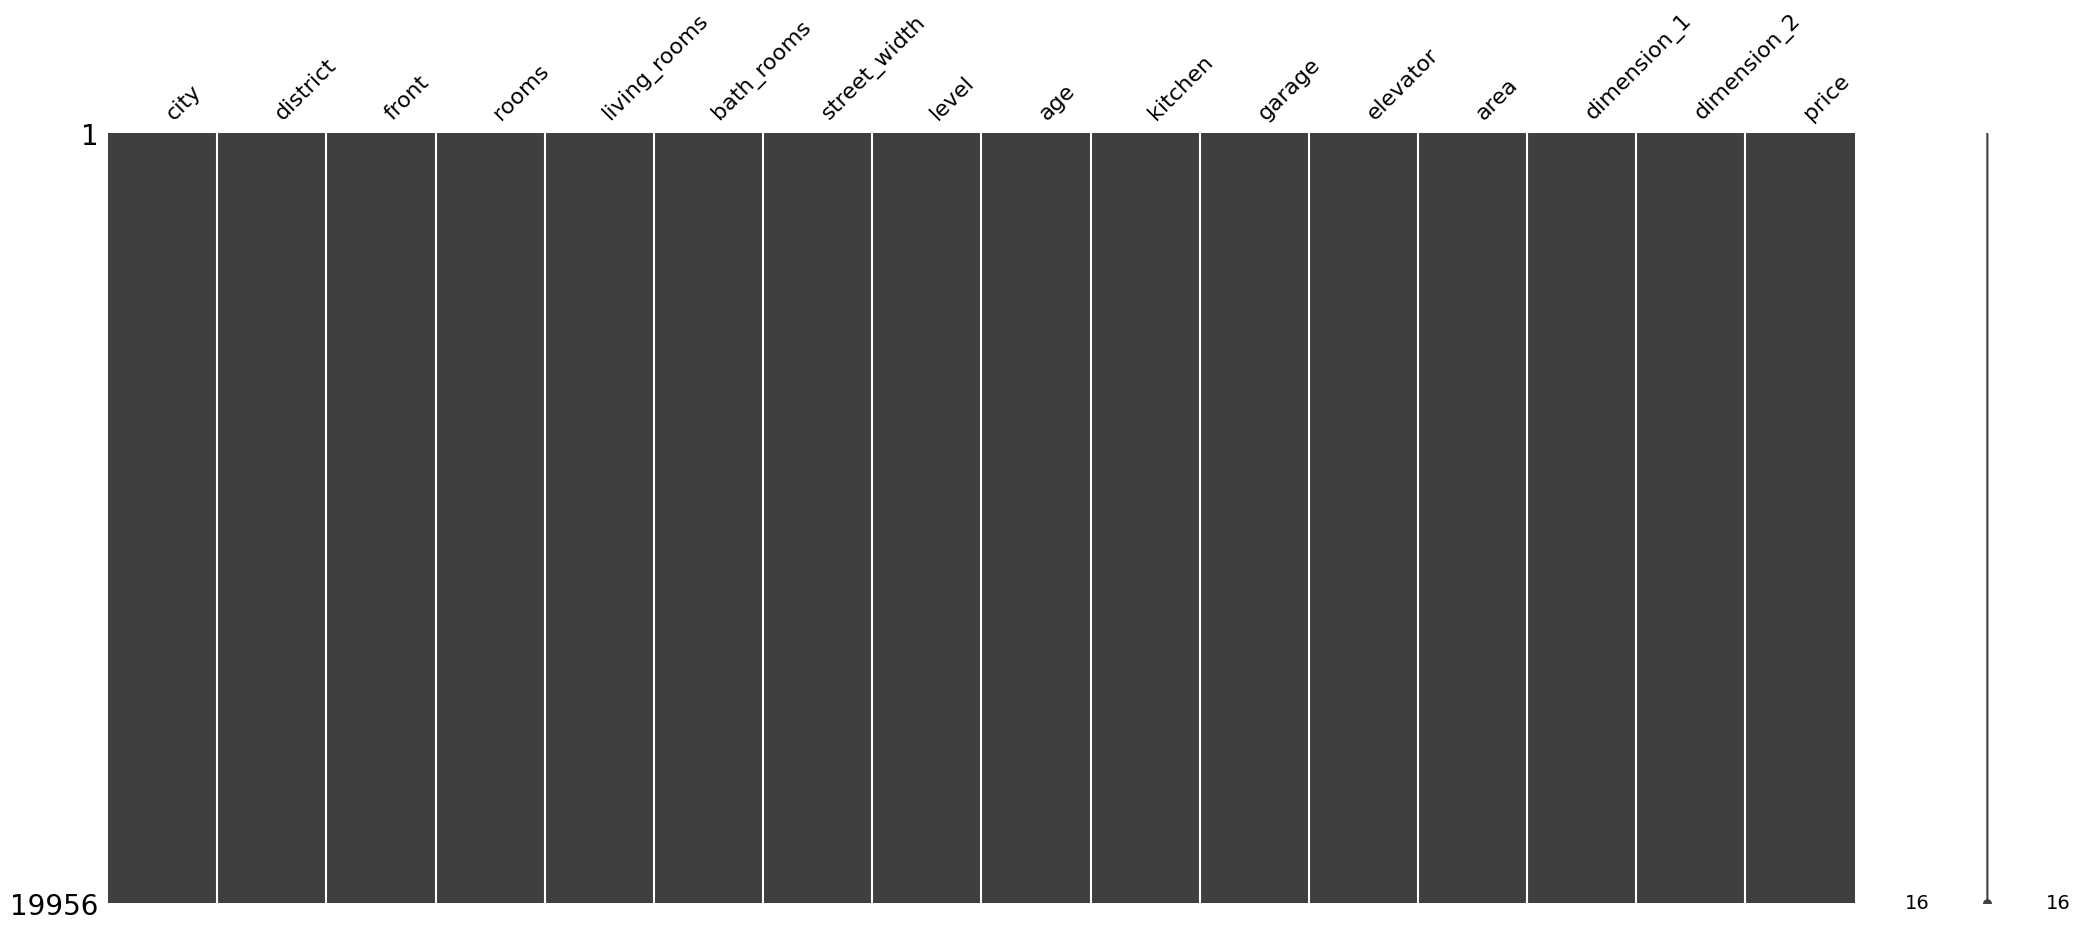

In [24]:
msno.matrix(df)

### 6. Encode the `categorical` data

In [25]:
# Create a label encoder object
le = LabelEncoder()

# , 'district', 'front'
# Select the object column you want to encode
object_column = df['city']

# Fit the label encoder to the object column
le.fit(object_column)

# Transform the object column using the label encoder
df['city'] = le.transform(object_column)

In [26]:
le = LabelEncoder()
object_column = df['district']
le.fit(object_column)
df['district'] = le.transform(object_column)

In [27]:
le = LabelEncoder()
object_column = df['front']
le.fit(object_column)
df['front'] = le.transform(object_column)

In [28]:
df.head()

,city,district,front,rooms,living_rooms,bath_rooms,street_width,level,age,kitchen,garage,elevator,area,dimension_1,dimension_2,price
0,25,93,3,4,1,3,15,4,8,1,1,1,103,10,10,420000
1,9,169,4,3,2,3,5,1,0,1,1,1,144,12,12,610000
2,0,180,9,2,1,2,20,2,0,1,0,1,340,18,18,960000
3,9,240,6,5,1,3,40,2,0,0,1,1,182,13,13,500000
4,9,240,3,5,1,3,30,1,0,1,0,0,197,14,14,580000


## 7. Removing Outliers

Outliers are data points that exist far away from the majority of your data. This can happen due to several reasons, such as incorrect data recording to genuine rare occurrences. Either way you will often want to remove these values as they can negatively impact your models. An example of the negative effect can be seen here where an outlier is causing almost all of the scaled data to be squashed to the lower bound.

### 7.1 Target Variable "price" Visualization with Outliers boundaries using Standrad Deviation

C:\Users\hasoo\AppData\Local\Temp\ipykernel_12788\271752530.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


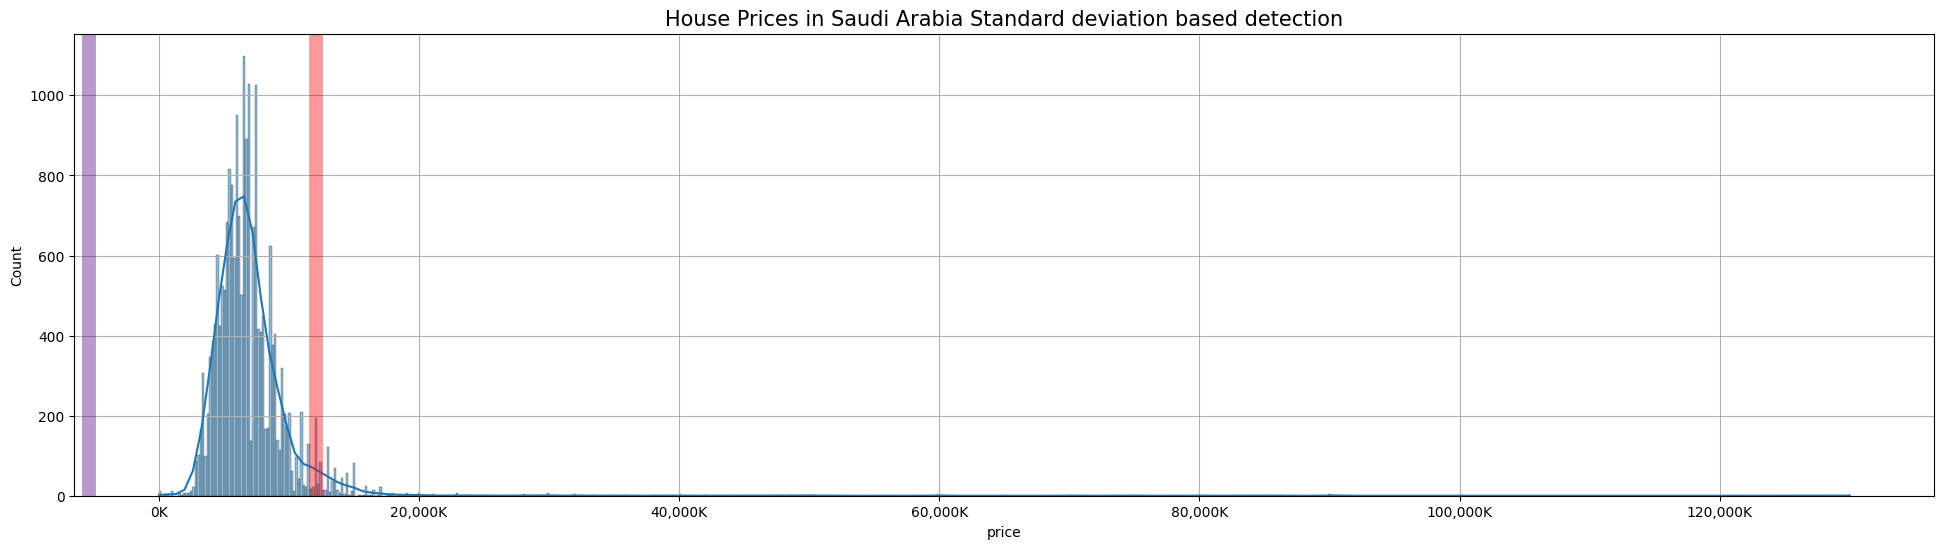

In [41]:
# Calculate the mean and standard deviation of the "price" variable
mean = df['price'].mean()
std = df['price'].std()

# Set the lower and upper bounds for outliers based on standard deviation
lower_bound = mean - 3 * std
upper_bound = mean + 1.2 * std

# Select the rows that contain outliers in the "price" column
outliers_df = df.loc[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Making a histogram of the price variable and adding Standard deviation based detection"
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x= df['price'], kde= True)
ax.axvline(upper_bound, color='red', ls='-', alpha=0.4, lw=10)
ax.axvline(lower_bound, color='indigo', ls='-', alpha=0.4, lw=10)
ax.set_title('House Prices in Saudi Arabia Standard deviation based detection', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/100]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 8. save the new csv file 

In [33]:
df.to_csv(r"../../DataSet/aqar_processed_19971.csv", index=False)

In [42]:
outliers_df.to_csv(r"../../DataSet/outliers.csv", index=False)